# Dataset
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy import stats
import math

sns.set_palette("dark") 

import gc

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Rakamin/Travel.csv')

Flow:
- Data exploration
- EDA
- Business insight
- Handling Missing Value
- Handling Duplicated Data
- Handling Invalid Values
- Feature Extraction
- Feature Selection
- Feature Transformation (Numeric)
- Feature Encoding (Categoric)
- Handling Imbalance
- Modelling
- Evaluation
- Visualization

# Exploratory Data Analysis

In [ ]:
df.sample(10, random_state=100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3476,203476,1,40.0,Company Invited,1,9.0,Salaried,Female,3,5.0,Basic,5.0,Unmarried,4.0,1,3,0,1.0,Executive,22324.0
1011,201011,0,36.0,Self Enquiry,3,9.0,Small Business,Fe Male,2,3.0,Deluxe,4.0,Unmarried,4.0,1,4,0,1.0,Manager,24278.0
159,200159,0,34.0,Company Invited,3,8.0,Small Business,Female,3,3.0,Basic,3.0,Divorced,7.0,0,5,1,2.0,Executive,17231.0
2477,202477,1,40.0,Self Enquiry,3,12.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,0,2,0,2.0,Manager,20764.0
291,200291,0,36.0,Self Enquiry,1,NaN,Large Business,Male,1,3.0,Deluxe,4.0,Single,5.0,0,2,1,0.0,Manager,19485.0
1618,201618,0,41.0,Self Enquiry,1,15.0,Salaried,Male,3,3.0,Basic,5.0,Married,3.0,0,1,0,0.0,Executive,17238.0
1983,201983,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,Executive,16009.0
1740,201740,0,55.0,Self Enquiry,1,6.0,Small Business,Male,2,3.0,King,5.0,Single,1.0,1,1,1,1.0,VP,34045.0
3298,203298,0,46.0,Self Enquiry,1,14.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,6.0,1,3,1,1.0,Executive,23155.0
4705,204705,1,36.0,Self Enquiry,3,11.0,Large Business,Male,3,4.0,Standard,5.0,Unmarried,2.0,1,4,1,2.0,Senior Manager,28260.0


In [ ]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

1. CustomerID: ID unik untuk setiap pelanggan. 
2. ProdTaken: Indikator biner (0 atau 1) yang menunjukkan apakah pelanggan telah membeli paket liburan (1) atau tidak (0).
3. Age: Usia pelanggan.
4. TypeofContact: Jenis kontak yang digunakan untuk menghubungi pelanggan (Value; 'Company Invited' atau 'Self Enquiry').
5. CityTier: Tingkat kota tempat tinggal pelanggan (mengacu pada tingkat perkembangan atau status kota)(Value; 1-3).
6. DurationOfPitch: Durasi presentasi dalam menit saat menawarkan paket liburan kepada pelanggan.
7. Occupation: Pekerjaan pelanggan ('Salaried', 'Small Business', atau 'Large Business').
8. Gender: Jenis kelamin pelanggan(Male dan Female).
9. NumberOfPersonVisiting: Jumlah orang yang akan mengunjungi (berkaitan dengan jumlah anggota keluarga atau rekan bisnis yang akan ikut dalam perjalanan liburan).
10. NumberOfFollowups: Jumlah tindak lanjut yang telah dilakukan dengan pelanggan.
11. ProductPitched: Produk yang ditawarkan kepada pelanggan.(Basic, Deluxe, Standard, Super Deluxe, King)
12. PreferredPropertyStar: Tingkat bintang properti yang diinginkan oleh pelanggan.(Value;Bintang 3-5)
13. MaritalStatus: Status perkawinan pelanggan.(Single,Married,Divorce,Unmaried)
14. NumberOfTrips: Jumlah perjalanan yang telah dilakukan oleh pelanggan sebelumnya.
15. Passport: Indikator biner (0 atau 1) yang menunjukkan apakah pelanggan memiliki paspor (1) atau tidak (0).
16. PitchSatisfactionScore: Skor kepuasan pelanggan terhadap presentasi penawaran.(Value;1-5)
17. OwnCar: Indikator biner (0 atau 1) yang menunjukkan apakah pelanggan memiliki mobil (1) atau tidak (0).
18. NumberOfChildrenVisiting: Jumlah anak yang ikut dalam perjalanan liburan.
19. Designation: Jabatan atau posisi pekerjaan pelanggan.(Executive, Manager, Senior Manager, AVP, VP)
20. MonthlyIncome: Pendapatan bulanan pelanggan.



1. Terdapat kesalahan penulisan pada kolom Gender dimana 'Fe male' seharusnya 'Female'
2. Terdapat penggunaan istilah yang berbeda pada 'Unmarried' dan 'Single' dimana kedua status itu sama

In [ ]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


1. Jumlah baris dalam dataset adalah 4.888.

2. Terdapat beberapa kolom yang memiliki missing value, yaitu kolom Age, DurationOfPitch, NumberOfTrips, PreferredPropertyStar, dan MonthlyIncome. Kolom-kolom ini perlu ditangani dengan metode pengisian nilai yang sesuai sebelum dilakukan analisis lebih lanjut.

3. Rata-rata usia (Age) pelanggan dalam dataset adalah 37.62 tahun dengan standar deviasi sebesar 9.32. Distribusi usia cenderung mendekati distribusi normal.

4. Durasi presentasi (DurationOfPitch), jumlah perjalanan (NumberOfTrips), dan pendapatan bulanan (MonthlyIncome) memiliki skewness positif, yang menunjukkan adanya pencilan atau outlier dalam data.

5. Sebagian besar pelanggan (75%) berada di CityTier 3.

6. Mayoritas pelanggan tidak memiliki paspor (Passport) dan tidak memiliki mobil pribadi (OwnCar).

7. Nilai kepuasan terhadap presentasi (PitchSatisfactionScore) rata-rata adalah 3.08 dari skala 1 hingga 5.

8. Mayoritas pelanggan (75%) memiliki jumlah anak yang mengunjungi (NumberOfChildrenVisiting) sebanyak 2.

9. Pendapatan bulanan (MonthlyIncome) rata-rata pelanggan adalah sebesar 23,619.85

10. Terdapat kolom-kolom diskrit atau ordinal lainnya yang tidak mencerminkan distribusi data tertentu.

In [ ]:
df[cat_cols].describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


1. Pada kolom TypeofContact terdapat missing value
2. Pada kolom TypeofContact dan Gender terdapat data yang tidak seimbang

In [ ]:
'''#Mengecek Skewness
from scipy.stats import skew

skewness = df[num_cols].apply(skew)
print(skewness)'''

'#Mengecek Skewness\nfrom scipy.stats import skew\n\nskewness = df[num_cols].apply(skew)\nprint(skewness)'

In [ ]:
for col in cat_cols:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



## Univariate Analysis

In [ ]:
# define numerical & categorical columns

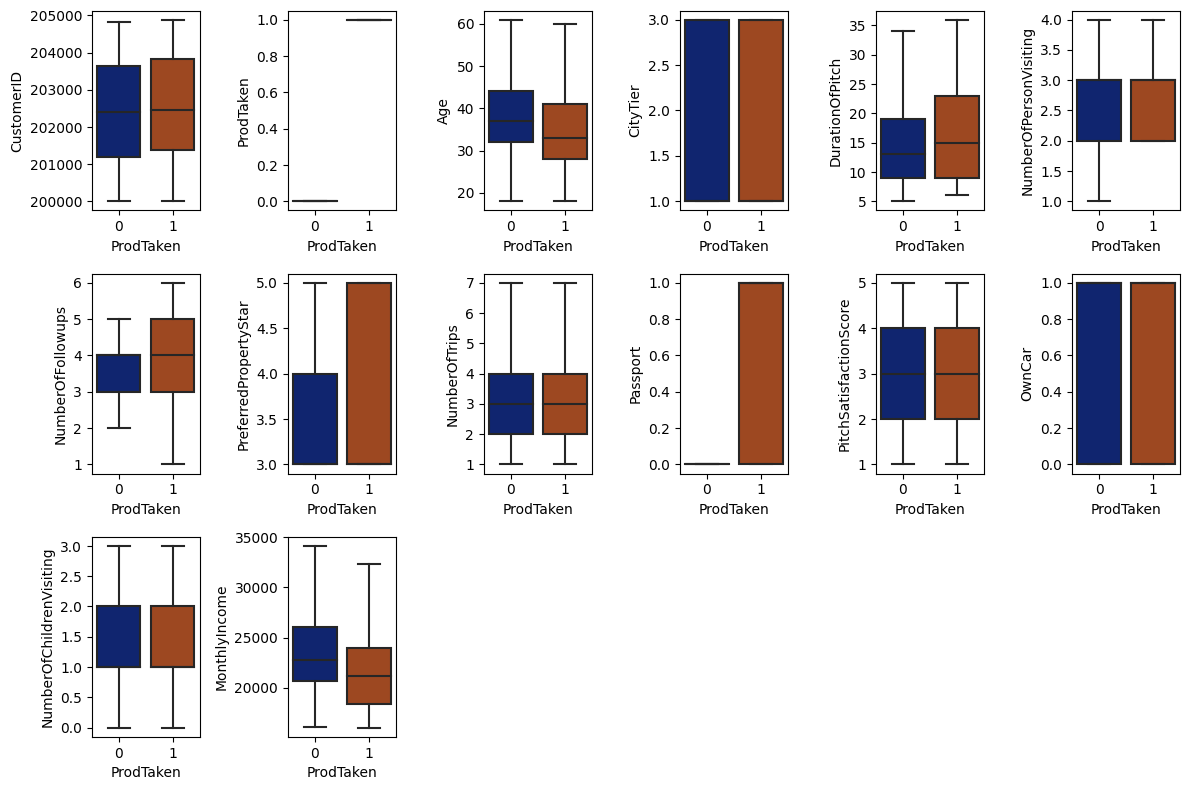

In [ ]:
plt.figure(figsize=(12,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[num_cols[i]], x=df['ProdTaken'],showfliers=False , orient='v')
    plt.tight_layout()

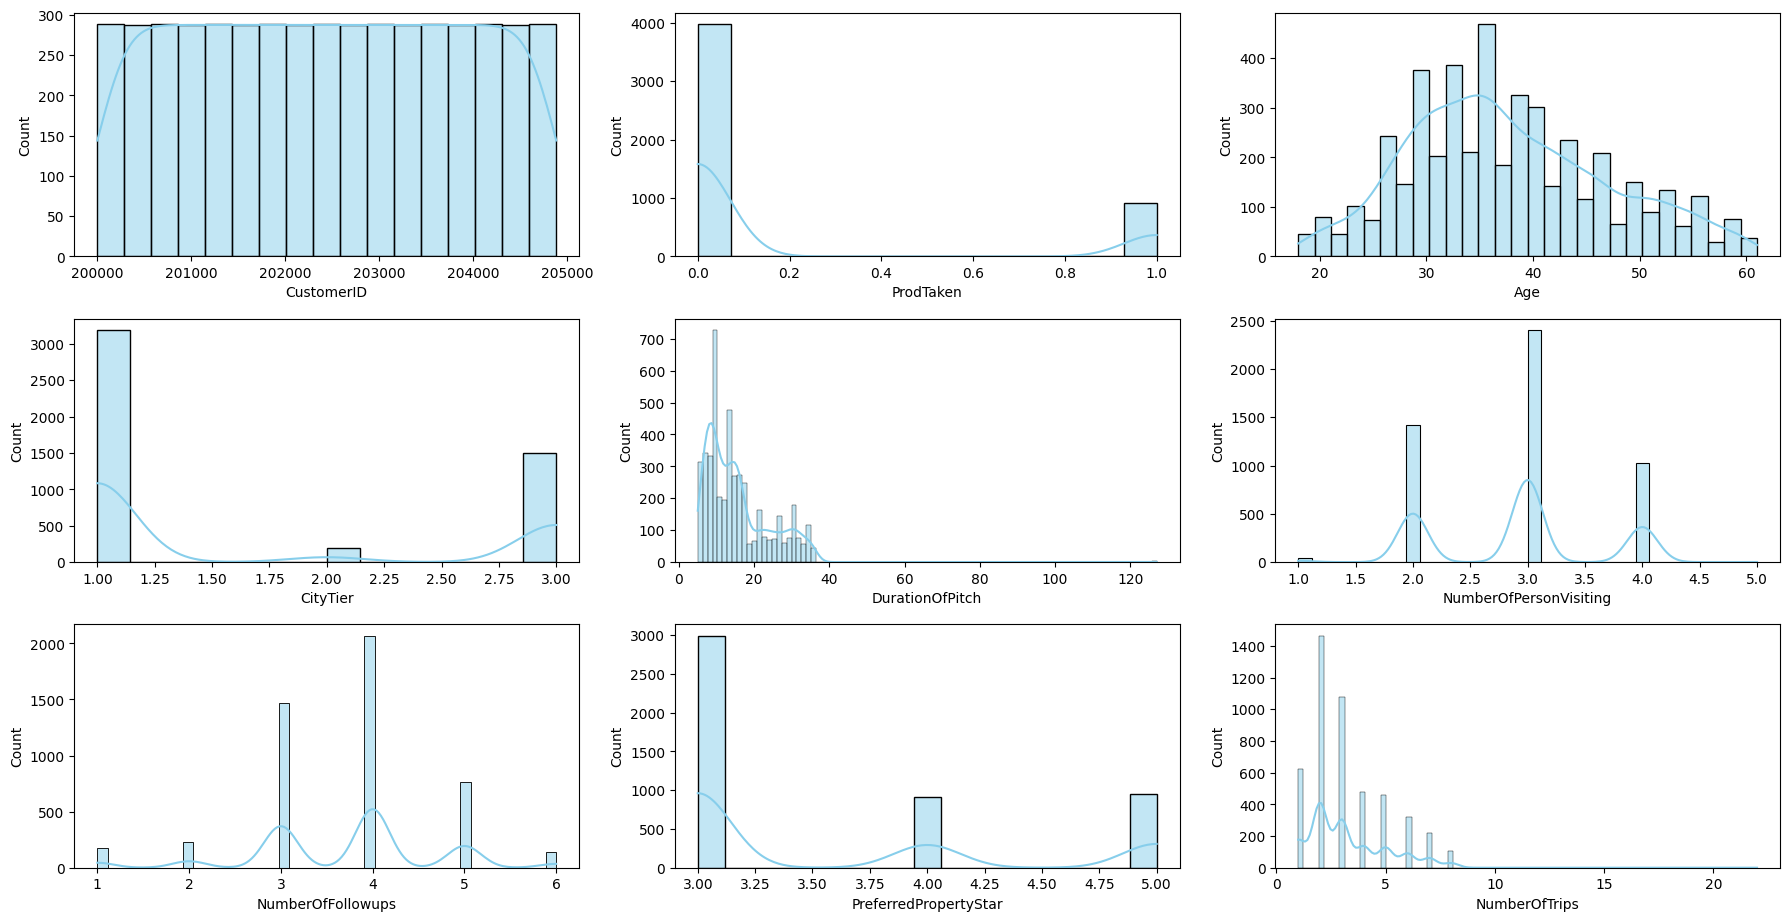

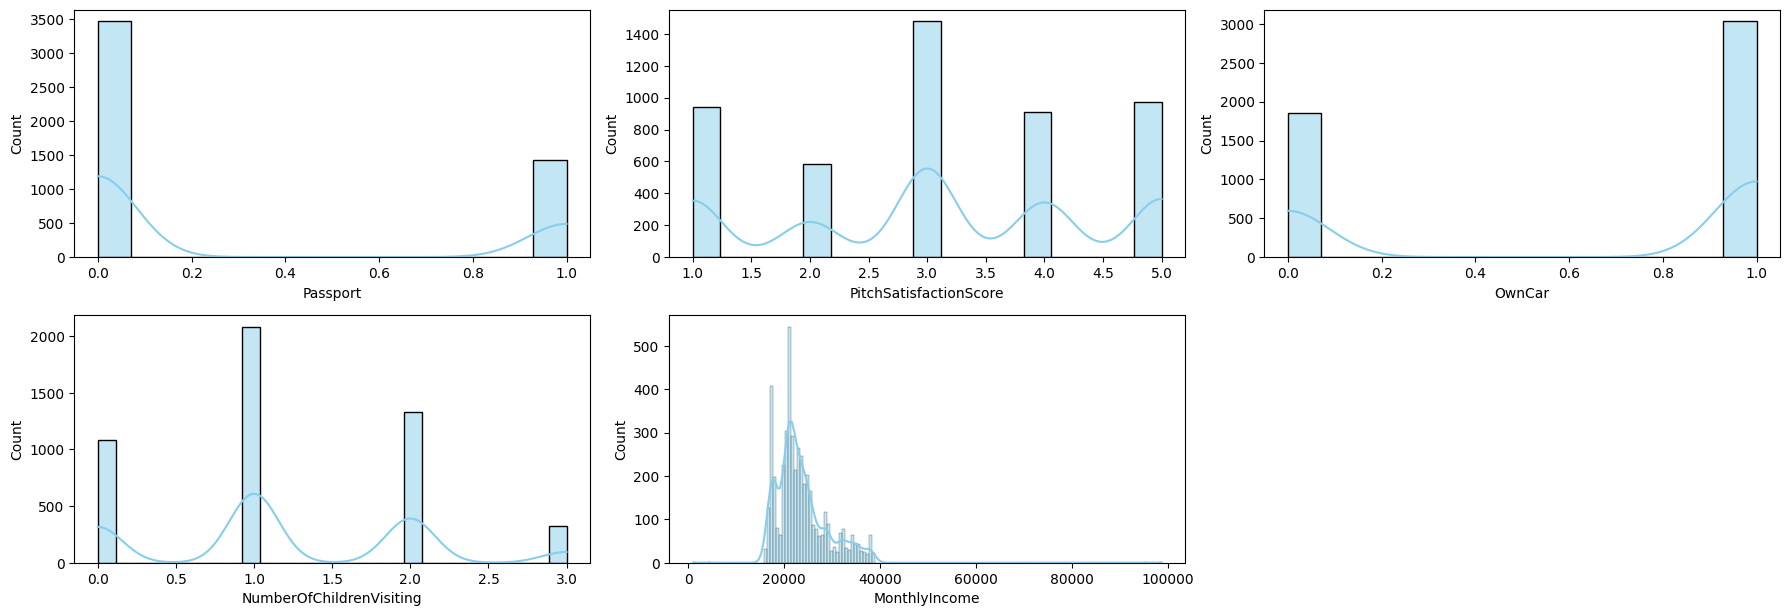

In [ ]:
num_cols_count = len(num_cols)
num_rows = math.ceil(num_cols_count / 3)
num_figures = math.ceil(num_cols_count / 9)

for f in range(num_figures):
    start_idx = f * 9
    end_idx = min(start_idx + 9, num_cols_count)
    plt.figure(figsize=(18, 15))
    for i, col in enumerate(num_cols[start_idx:end_idx]):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df[col].dropna(), kde=True, color='skyblue')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Kesimpulan :
1. Distribusi kolom Age cenderung mendekati distribusi normal, menunjukkan penyebaran nilai yang seimbang.
2. kolom DurationOfPitch, NumberOfTrips, dan MonthlyIncome memiliki skewness positif, menunjukkan adanya pencilan atau outlier dalam data. Pencilan ini dapat memiliki pengaruh yang signifikan terhadap hasil analisis.
3. Untuk kolom lainnya, dapat diabaikan karena umumnya mengandung data diskrit atau ordinal, yang tidak memerlukan pertimbangan yang sama dengan variabel kontinu.

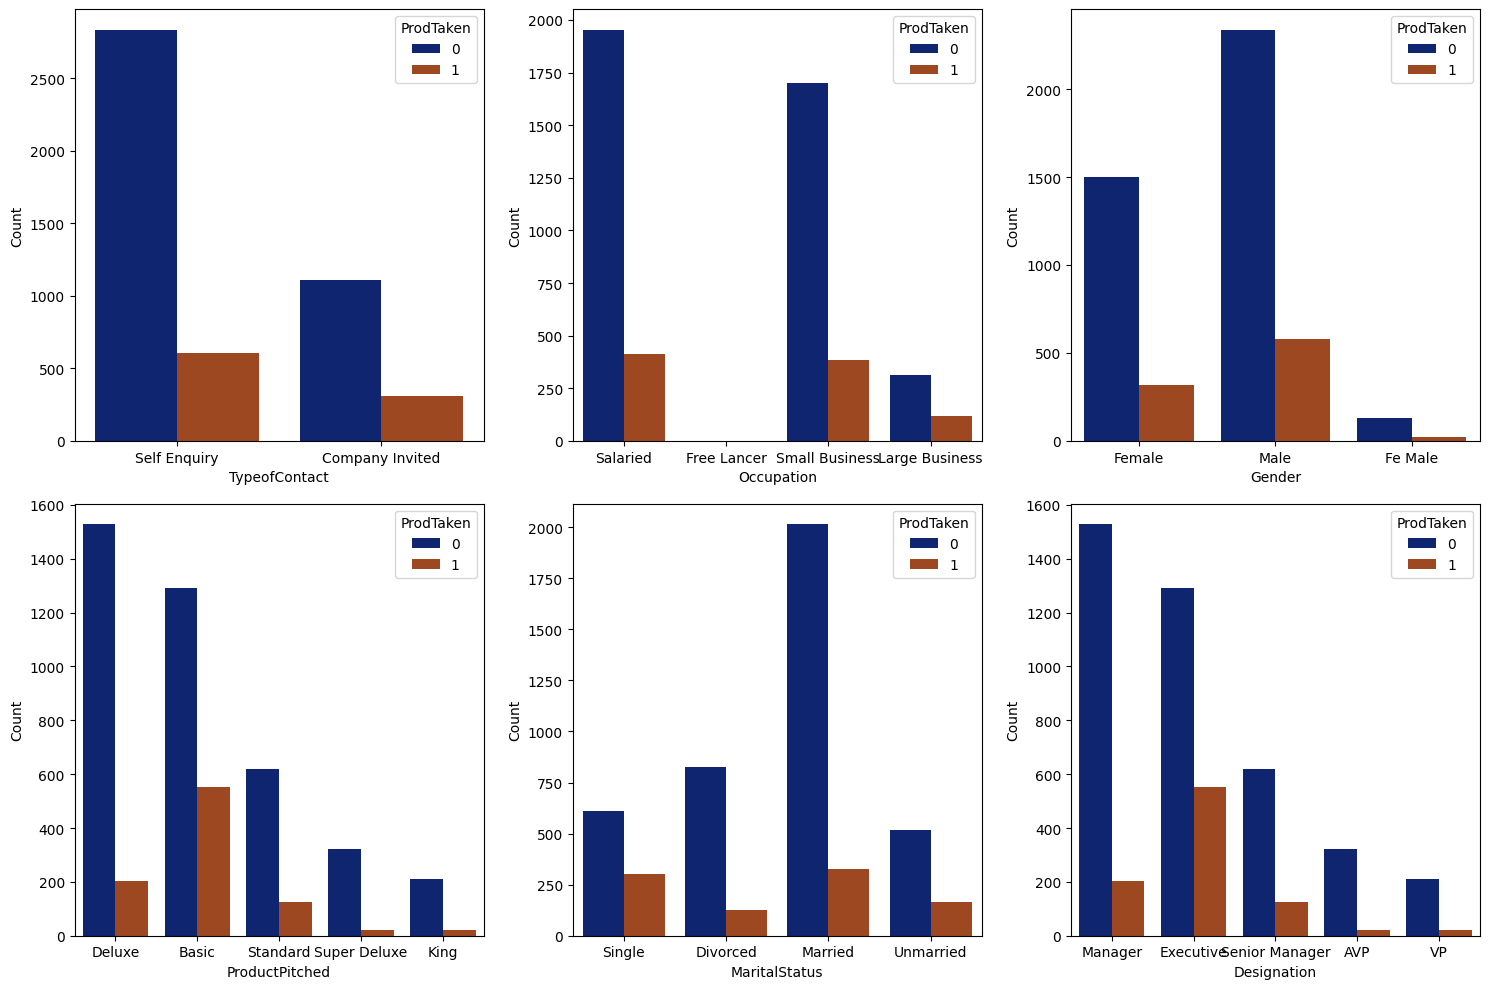

In [ ]:
# Univariate analysis for categorical columns
num_cat_cols = len(cat_cols)
num_rows = (num_cat_cols - 1) // 3 + 1
plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=col, data=df, hue=df['ProdTaken'])
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

1. Pada kolom TypeofContact distribusi Self Enquiry lebih banyak daripada Company Visited
2. Pada kolom Occupation distribusi Salaried dan Small Business paling banyak dibanding yang lainnya, dan pada Free Lancer nantinya akan dihapus karena tidak ada nilainya
3. Pada kolom Gender jenis kelamin laki-laki lebih banyak dibandingkan perempuan. Dan ada kesalahan penulisan Fe Male yang dimana seharusnya Female.
4. Pada kolom ProductPitched basic dan Deluxe memiliki penjualan tertinggi
5. Pada kolom MaritalStatus Customer yang sudah menikah memiliki jumlah paling banyak
6. Pada kolom Designation customer dengan jabatan Executive dan Manager memiliki jumlah paling banyak

### Multivariate Analysis

<ipython-input-235-493e948be1a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


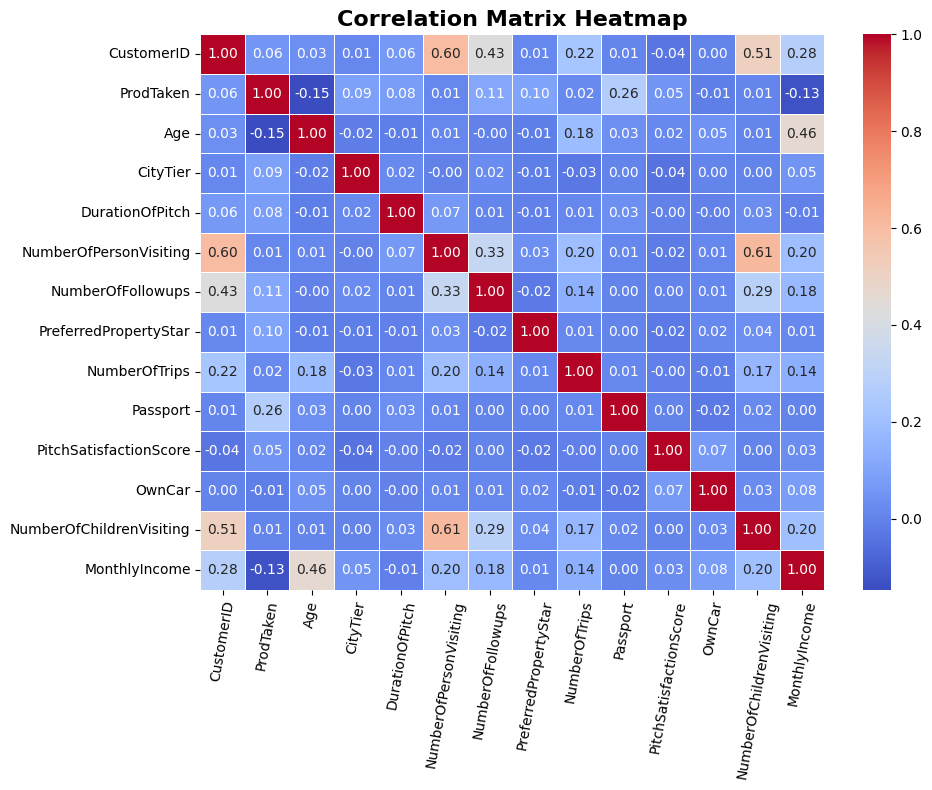

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Berdasarkan Visualisasi diatas dapat kita ambil kesimpulan bahwa:

1. Kolom **MonthlyIncome, Passport dan Age** memiliki korelasi kuat terhadap kolom target (ProdTaken)
2. Kolom **NumberOfChildrenVisiting dan NumberOfPersonVisiting** memiliki korelasi kuat

## Business Insight and Visualization

### **Persebaran data pembelian produk (ProdTaken)**

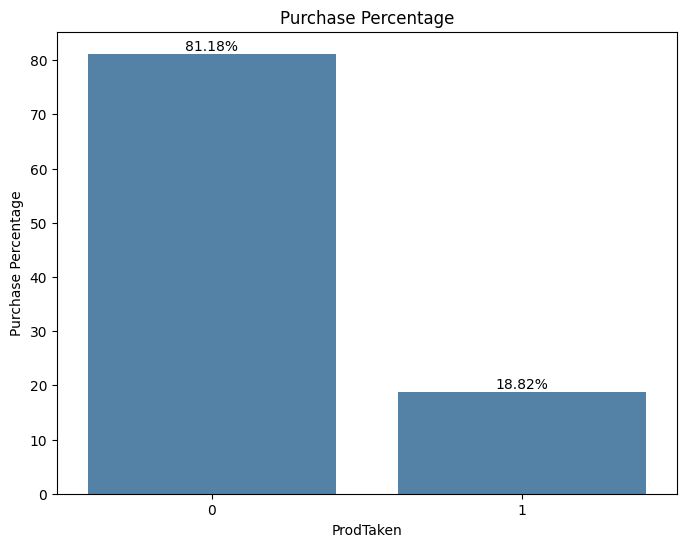

In [ ]:
# Calculate the purchase percentage by Passport
purchase_percentage = df.groupby('ProdTaken').size() / len(df) * 100

# Plot the purchase percentage
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, color='steelblue')
plt.xlabel('ProdTaken')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

### Persebaran data pelanggan yang **Tidak Membeli** produk berdasarkan kategori Jenis Kelamin, Status Perkawinan, serta Jenis Pekerjaan

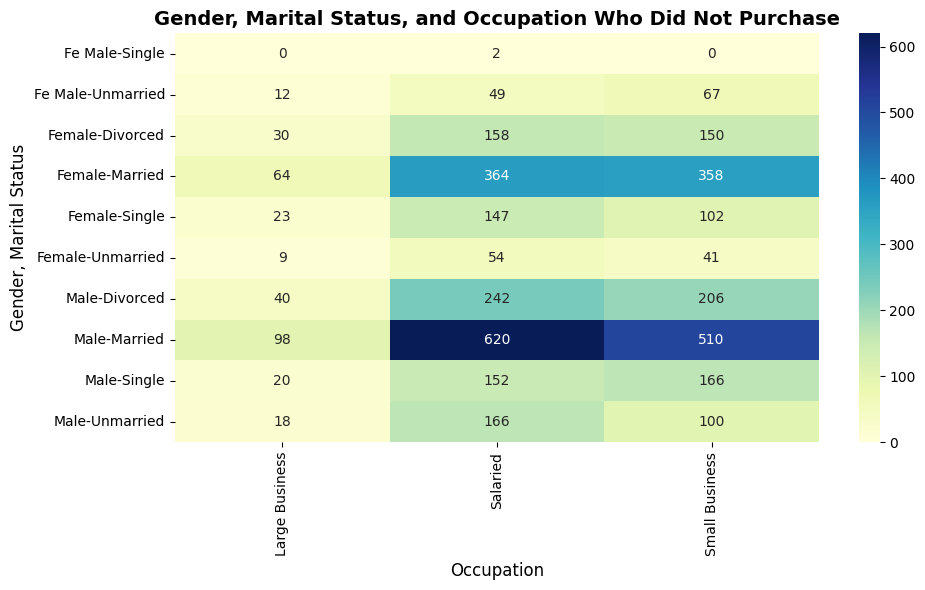

In [ ]:
# Select the relevant columns for analysis
selected_columns = ['Gender', 'MaritalStatus', 'Occupation', 'ProdTaken']  # Modify with the desired columns
data = df[selected_columns]

# Filter only rows where product was taken (ProdTaken = 0)
data = data[data['ProdTaken'] == 0]

# Create cross-tabulation table
cross_tab = pd.crosstab(index=[data['Gender'], data['MaritalStatus']], columns=data['Occupation'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Gender, Marital Status', fontsize=12)
plt.title('Gender, Marital Status, and Occupation Who Did Not Purchase', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Persebaran data pelanggan yang **Membeli** produk berdasarkan kategori Jenis Kelamin, Status Perkawinan, serta Jenis Pekerjaan 

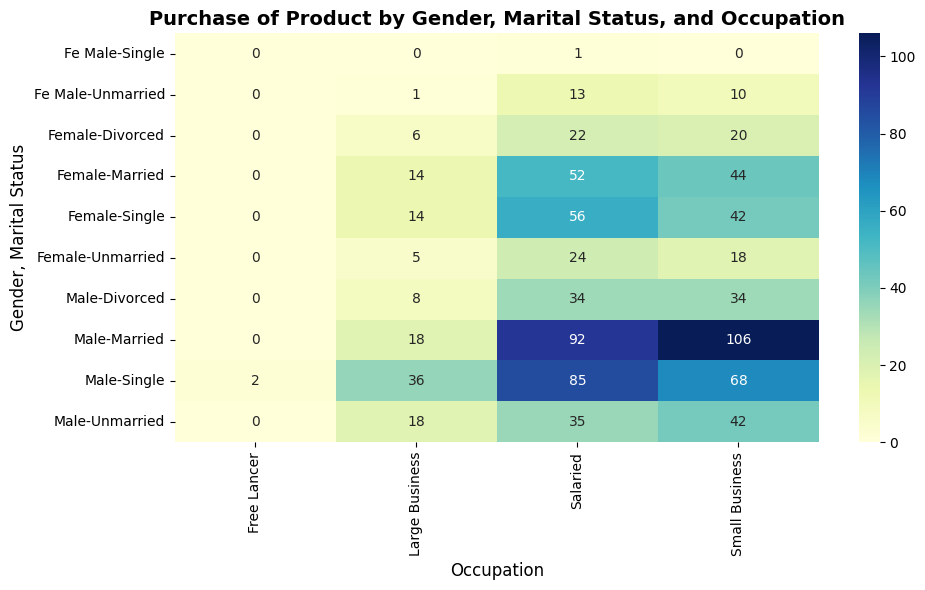

In [ ]:
# Select the relevant columns for analysis
selected_columns = ['Gender', 'MaritalStatus', 'Occupation', 'ProdTaken']  # Modify with the desired columns
data = df[selected_columns]

# Filter only rows where product was taken (ProdTaken = 1)
data = data[data['ProdTaken'] == 1]

# Create cross-tabulation table
cross_tab = pd.crosstab(index=[data['Gender'], data['MaritalStatus']], columns=data['Occupation'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Gender, Marital Status', fontsize=12)
plt.title('Purchase of Product by Gender, Marital Status, and Occupation', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Berdasarkan dua visualisasi diatas dapat dilihat bahwa:

1.   kebanyakan produk dibeli oleh laki-laki, sudah menikah dan wiraswasta.
2.   mayoritas yang tidak membeli produk adalah laki-laki yang sudah menikah dan bekerja sebagai karyawan.




### **Bagaimana persentase pembelian produk berdasarkan kategori umur?**

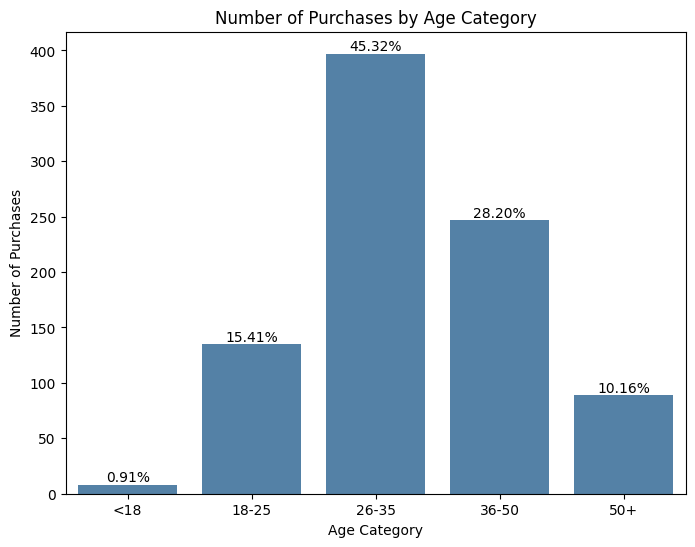

In [ ]:
# Segment age into categories
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], labels=['<18', '18-25', '26-35', '36-50', '50+'])

# Count the number of purchases by age category
purchase_counts = df.groupby('AgeCategory')['ProdTaken'].sum().reset_index()

# Calculate the total purchases
total_purchases = purchase_counts['ProdTaken'].sum()

# Calculate the percentage of purchases by age category
purchase_counts['Percentage'] = purchase_counts['ProdTaken'] / total_purchases * 100

# Plot the purchase counts by age category
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='AgeCategory', y='ProdTaken', data=purchase_counts, color='steelblue')
plt.xlabel('Age Category')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Age Category')

# Annotate percentages on the bars
for i, row in purchase_counts.iterrows():
    percentage = row['Percentage']
    ax.annotate(f'{percentage:.2f}%', xy=(i, row['ProdTaken']), ha='center', va='bottom', color='black')

plt.show()
df.drop('AgeCategory', axis=1, inplace=True)

Berdasarkan visualisasi diatas, pembeli produk rata-rata berumur 26-50


**Bisnis Insight:**

Karena mayoritas yang membeli produk adalah anak muda, maka kita bisa memaksimalkan promosi melalui media sosial seperti Instagram, Tiktok, Ataupun Facebook dimana mayoritas penggunanya adalah anak muda.

### **Bagaimana persentase pembelian produk berdasarkan kategori City Tier atau Tingkat Perkembangan Suatu Kota?**

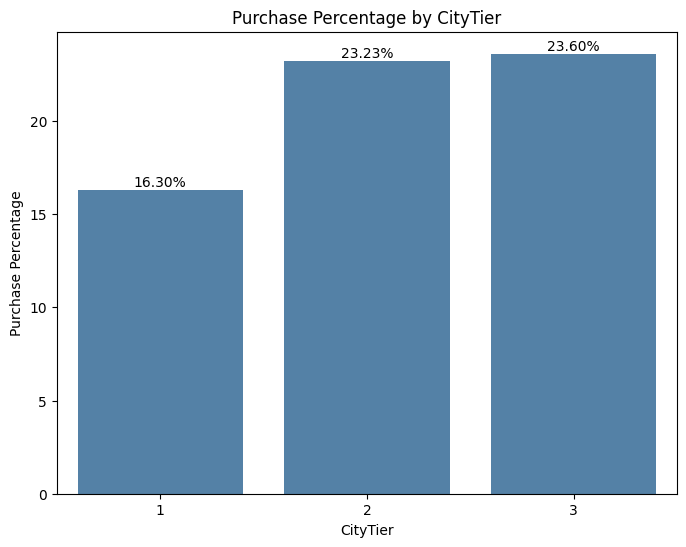

In [ ]:
# Calculate the purchase percentage by CityTier
purchase_percentage = df.groupby('CityTier')['ProdTaken'].mean() * 100

# Plot the purchase percentage by CityTier
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, color='steelblue')
plt.xlabel('CityTier')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage by CityTier')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

Berdasarkan visualisasi diatas, kebanyakan transaksi dilakukan oleh pelanggan yang berasal dari CityTier 2 dan 3.

**Bisnis Insight:**

Karena kebanyakan pembeli tinggal dilingkungan kota yang sudah maju atau juga tinggal di kota satelit maka kita dapat mengkampanyekan banyak produk di area tersebut mengingat daya beli mereka yang cukup tinggi.

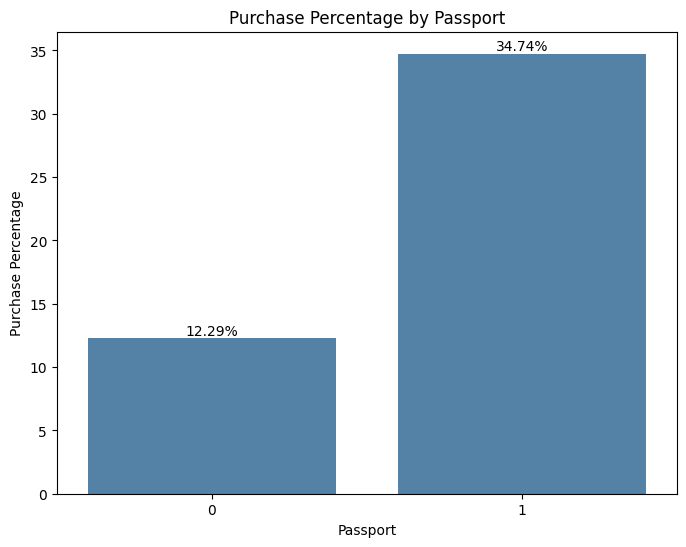

In [ ]:
# Calculate the purchase percentage by CityTier
purchase_percentage = df.groupby('Passport')['ProdTaken'].mean() * 100

# Plot the purchase percentage by CityTier
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, color='steelblue')
plt.xlabel('Passport')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage by Passport')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

Berdasarkan visualisasi diatas, kebanyakan transaksi dilakukan oleh orang 
yang memiliki passport.

**Bisnis Insight:**

Kita bisa menawarkan jasa pembuatan pasport sebagai bundling product ketika melakukan promosi paket travel.

# Data Preprocessing

## Handling missing value

In [ ]:
# Making new dataframe
df_copy = df.copy()

In [ ]:
# Cek jumlah missing value dalam setiap kolom
missing_values = df_copy.isnull().sum()
print(missing_values)

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64


### Opsi 1: Mean and Median

In [ ]:
df_mv1 = df.copy()

Berdasarkan pengamatan EDA maka:
*   Kolom **Age** akan diisi dengan nilai mean
*   Kolom **DurationOfPitch** karena skewed atau terdapat outlier akan diisi oleh nilai median
*   Kolom **NumberOfFollowups** akan diisi oleh nilai mean
*   Kolom **PreferredPropertyStar** akan diisi oleh nilai mean
*   Kolom **NumberOfTrips** karena skewed atau terdapat outlier maka akan diisi oleh median
*   Kolom **NumberOfChildrenVisiting** akan diisi oleh nilai mean
*   Kolom **MonthlyIncome** karena skewed atau terdapat outlier maka diisi oleh nilai median
*   Kolom **TypeofContact** karena bertipe kategori maka akan diisi oleh nilai modus











In [ ]:
# Mengisi kolom numerik dengan nilai mean & median
df_mv1['Age'].fillna(df_mv1['Age'].mean(), inplace=True)
df_mv1['DurationOfPitch'].fillna(df_mv1['DurationOfPitch'].median(), inplace=True)
df_mv1['NumberOfFollowups'].fillna(df_mv1['NumberOfFollowups'].mean(), inplace=True)
df_mv1['PreferredPropertyStar'].fillna(df_mv1['PreferredPropertyStar'].mean(), inplace=True)
df_mv1['NumberOfTrips'].fillna(df_mv1['NumberOfTrips'].median(), inplace=True)
df_mv1['NumberOfChildrenVisiting'].fillna(df_mv1['NumberOfChildrenVisiting'].mean(), inplace=True)
df_mv1['MonthlyIncome'].fillna(df_mv1['MonthlyIncome'].median(), inplace=True)

# Mengisi kolom kategorik dengan nilai modus
df_mv1['TypeofContact'].fillna(df_mv1['TypeofContact'].mode()[0], inplace=True)

In [ ]:
df_mv1.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Opsi 2: Mean and Zero Imputation

In [ ]:
df_mv2 = df.copy()

untuk kolom Age, PrefferedPropertyStar, dan MonthlyIncome mengisi data kosong dengan rata - rata karena merupakan nilai numerik absolut

In [ ]:
df_mv2['Age'].fillna(df_mv2['Age'].mean(), inplace=True)
df_mv2['PreferredPropertyStar'].fillna(df_mv2['PreferredPropertyStar'].mean(), inplace=True)
df_mv2['MonthlyIncome'].fillna(df_mv2['MonthlyIncome'].mean(), inplace=True)

untuk kolom NumberOfTrips, NumberOfChildrenVisiting, NumberOfFollowups, dan DurationOfPitch mengunakan nilai 0 untuk mengisi data kosong dikarenakan kemungkinan kekosongan diakibatkan customer melakukan itu sebanyak 0 kali

In [ ]:
df_mv2['NumberOfTrips'].fillna(0, inplace=True)
df_mv2['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_mv2['NumberOfFollowups'].fillna(0, inplace=True)
df_mv2['DurationOfPitch'].fillna(0, inplace=True)

untuk kolom TypeofContact, menggunakan modus untuk mengisi data kosong dikarenakan termasuk data kategorik

In [ ]:
df_mv2['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

In [ ]:
# Cek jumlah missing value dalam setiap kolom setelah pengisian nilai hilang
df_mv2.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Opsi 3: KNN Imputer

In [ ]:
df_mv3 = df.copy()
col_to_impute = ['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_mv3[col_to_impute] = pd.DataFrame(imputer.fit_transform(df_mv3[col_to_impute]),columns = df_mv3[col_to_impute].columns)

In [ ]:
df_mv3['TypeofContact'].fillna(df_mv3['TypeofContact'].mode()[0], inplace=True)

In [ ]:
df_mv3.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Opsi 4: MICE

Opsi yang kami ambil untuk handle missing value adalah menggunakan **metode MICE** karena imputasi dilakukan menggunakan model regresi.

In [ ]:
#df_mv4 = df.copy()
col_to_impute = ['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=100, max_iter=10)
#df_mv4[col_to_impute] = imputer.fit_transform(df_mv4[col_to_impute])
df_copy[col_to_impute] = imputer.fit_transform(df_copy[col_to_impute])

In [ ]:
#df_mv4['TypeofContact'].fillna(df_mv4['TypeofContact'].mode()[0], inplace=True)
df_copy['TypeofContact'].fillna(df_copy['TypeofContact'].mode()[0], inplace=True)

In [ ]:
#df_mv4.isnull().sum()
df_copy.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

Setelah dilakukan proses imputasi untuk missing values menggunakan metode MICE, dataset sudah tidak ada kolom yang kosong.

## Handling Invalid Values

Berdasarkan hasil pengamatan EDA:
*   Terdapat kesalahan pada penulisan kolom Gender dimana "Fe Male" bermakna sama dengan "Female". Maka "Female" akan direplace menjadi "Female"
*   Terdapat penggunaan istilah yang berbeda pada kolom Marital status yaitu "Unmarried" dan "Single" dimana kedua status tersebut bermakna sama. Maka "Unmarried" akan direplace menjadi "Single"

In [ ]:
#Terdapat kesalahan penulisan pada kolom Gender dimana 'Fe Male' seharusnya 'Female'
df_copy['Gender'] = df_copy['Gender'].replace({'Fe Male': 'Female'})

#Terdapat penggunaan istilah yang berbeda pada 'Unmarried' dan 'Single' dimana kedua status itu sama
df_copy['MaritalStatus'] = df_copy['MaritalStatus'].replace({'Unmarried': 'Single'})

## Handling Duplicated Data

In [ ]:
#Cek duplicate data
df_copy.duplicated(subset=['CustomerID']).sum()

0

Berdasarkan hasil pemeriksaan di atas, tidak terdapat data customer id yang terduplikasi

In [ ]:
# remove CustomerID to see duplicate rows
df_copy.drop('CustomerID', axis=1, inplace=True)
print(f'Jumlah baris data sebelum dilakukan penghapusan data duplikat adalah {df_copy.shape[0]}')

# remove duplicate rows
df_copy.drop_duplicates(inplace=True)
print(f'Jumlah baris data setelah dilakukan penghapusan data duplikat adalah {df_copy.shape[0]}')

Jumlah baris data sebelum dilakukan penghapusan data duplikat adalah 4888
Jumlah baris data setelah dilakukan penghapusan data duplikat adalah 4747


Setelah dilakukan pengecekan ulang dengan menghapus kolom CustomerID (drop CustomerID) ditemukan beberapa data yang duplikat. Kemudian dilakukan penghapusan data duplikat.

## Handling Outlier

Pada proses handling outlier kita mengambil 2 pilihan langkah untuk menghapus outlier yaitu menggunakan teknik **IQR** dan **Z-Score**.

### Opsi 1: IQR #####

In [ ]:
df_out1 = df_copy.copy()

In [ ]:
# Menampilkan jumlah baris sebelum memfilter outlier
print(f'Jumlah baris sebelum memfilter outlier adalah {df_out1.shape[0]}')

# Memfilter outlier menggunakan IQR
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    Q1 = df_out1[col].quantile(0.25)
    Q3 = df_out1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out1 = df_out1[(df_out1[col] >= lower_bound) & (df_out1[col] <= upper_bound)]

# Menampilkan jumlah baris setelah memfilter outlier
print(f'Jumlah baris setelah memfilter outlier adalah {df_out1.shape[0]}')

Jumlah baris sebelum memfilter outlier adalah 4747
Jumlah baris setelah memfilter outlier adalah 4192


Berdasarkan hasil IQR dapat dilihat bahwa total data yang terhapus saat proses memfilter outlier cukup besar yaitu sebesar 555 baris data yang terhapus

### Opsi 2: Z-Score

In [ ]:
# view total rows before filtered
print(f'Jumlah baris sebelum memfilter outlier adalah {df_copy.shape[0]}')

# handle outlier using z-score
filtered_entries = np.array([True] * len(df_copy))
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_copy[col]))
    filtered_entries = (zscore < 3) & filtered_entries    

# view total rows after filtered
df_copy = df_copy[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier adalah {df_copy.shape[0]}')

Jumlah baris sebelum memfilter outlier adalah 4747
Jumlah baris setelah memfilter outlier adalah 4737


Sedangkan pada proses Z-Score didapatkan bahwa jumlah baris data yang terhapus saat memproses outlier tidak terlalu signifikan yaitu hanya sekitar 10 baris data saja yang terhapus. Oleh karena kita keterbatasan data, dan harus meminimalisir berkurangnya data maka kita memilih **metode Z-Score** untuk proses handling data


## Feature Engineering

*Feature Engineering adalah proses mengubah data mentah menjadi fitur berguna yang membantu kita memahami model dengan lebih baik dan meningkatkan daya prediktifnya. Berikut beberapa langkah dari feature engineering*



### Feature Extraction

Pada feature extraction kita akan menggabungkan kolom NumberOfPersonVisiting dan NumberOfChildrenVisting menjadi kolom baru yaitu TotalVisiting. 

In [ ]:
# Merge column NumberOfPersonVisiting & NumberOfChildrenVisiting

df_copy['TotalVisiting'] = df_copy['NumberOfPersonVisiting'] + df_copy['NumberOfChildrenVisiting']

<ipython-input-266-ef1a4e286030>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['TotalVisiting'] = df_copy['NumberOfPersonVisiting'] + df_copy['NumberOfChildrenVisiting']


### Feature Transformation ####

Berdasarkan insight yang kita dapat dari EDA, ada beberapa fitur yang berkorelasi dengan target tapi belum berdistribusi normal atau skew positif. Maka kita lakukan log Transformasi dan Standarized agar distribusi nya normal/ mendekati normal.

<Axes: title={'center': 'Distribusi MonthlyIncome Sebelum Log Transformation'}, xlabel='MonthlyIncome', ylabel='Density'>

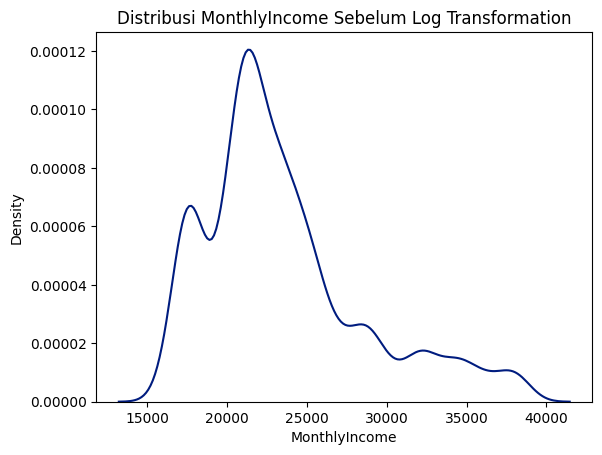

In [ ]:
# Distribusi MonthlyIncome (nilai asli)
plt.title('Distribusi MonthlyIncome Sebelum Log Transformation')
sns.kdeplot(df_copy['MonthlyIncome'])

<Axes: title={'center': 'Distribusi MonthlyIncome Setelah Log Transformation'}, xlabel='MonthlyIncome', ylabel='Density'>

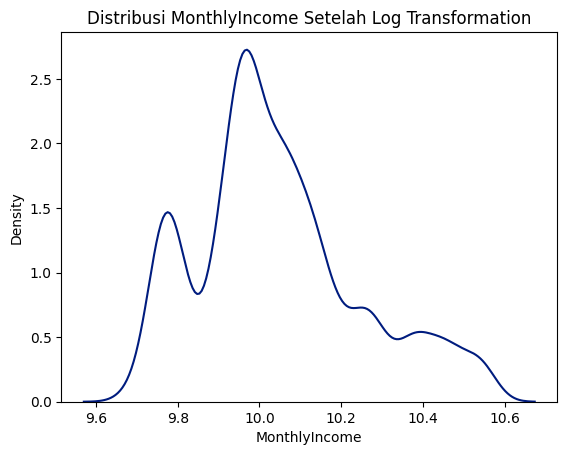

In [ ]:
# Distribusi MonthlyIncome(Setelah Log Transformation)
plt.title('Distribusi MonthlyIncome Setelah Log Transformation')
sns.kdeplot(np.log(df_copy['MonthlyIncome']))

In [ ]:
# kita transformasi
df_copy['log_MonthlyIncome']= np.log(df_copy['MonthlyIncome'])

In [ ]:
# drop kolom monthlyincome (nilai asli)
df_copy= df_copy.drop(columns='MonthlyIncome')

<Axes: title={'center': 'Distribusi Age sebelum Standarisasi'}, xlabel='Age', ylabel='Density'>

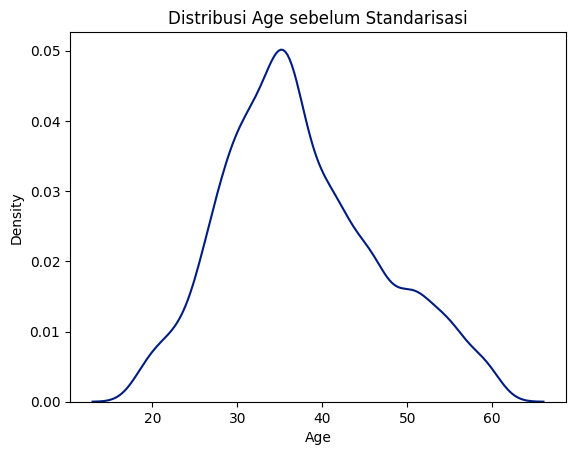

In [ ]:
# Distribusi Age (nilai asli) 
plt.title('Distribusi Age sebelum Standarisasi')
sns.kdeplot(df_copy['Age'])

<Axes: title={'center': 'Distribusi Age Sesudah Standarisasi'}, xlabel='stand_Age', ylabel='Density'>

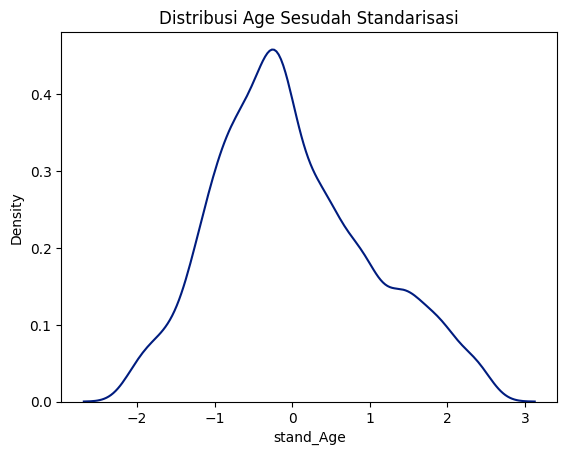

In [ ]:
#karena distribusi sudah normal maka dilakukan standardisasi
df_copy['stand_Age']=StandardScaler().fit_transform(df_copy['Age'].values.reshape(len(df_copy), 1))
plt.title('Distribusi Age Sesudah Standarisasi')
sns.kdeplot(df_copy['stand_Age'])

In [ ]:
# drop kolom age (nilai asli)
df_copy= df_copy.drop(columns='Age')

<Axes: title={'center': 'Distribusi DurationOfPitch Sebelum Log Transformation'}, xlabel='DurationOfPitch', ylabel='Density'>

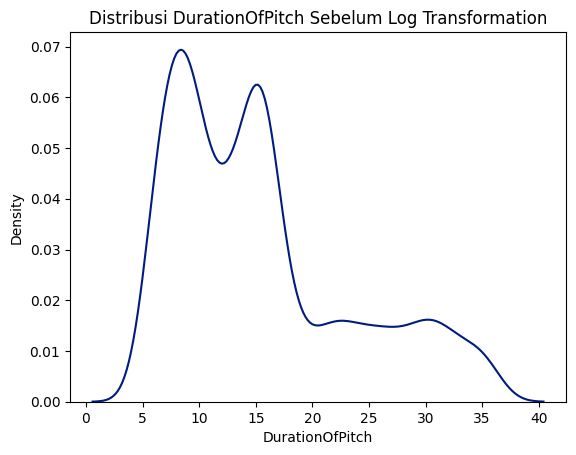

In [ ]:
# Distribusi DurationOfPitch (nilai asli)
plt.title('Distribusi DurationOfPitch Sebelum Log Transformation')
sns.kdeplot(df_copy['DurationOfPitch'])

<Axes: title={'center': 'Distribusi DurationOfPitch Setelah Log Transformation'}, xlabel='stand_DurationOfPitch', ylabel='Density'>

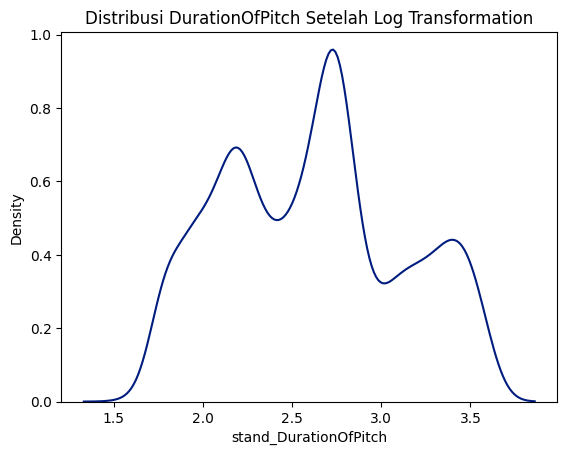

In [ ]:
#Distribusi DurationOfPitch (Setelah Log Transformation)
plt.title('Distribusi DurationOfPitch Setelah Log Transformation')
df_copy['stand_DurationOfPitch']=np.log(df_copy['DurationOfPitch'])
sns.kdeplot(df_copy['stand_DurationOfPitch'])

In [ ]:
# drop kolom DurationOfPitch (nilai asli)
df_copy= df_copy.drop(columns='DurationOfPitch')

### Feature Encoding

Pada Feature Encoding categorical dibagi menjadi dua metode yaitu encoding yang bertipe data ordinal dan encoding yang bertipe data selain ordinal dan menggunakan librari **LabelEncoder** dan **OneHotEncoder** dari sklearn

In [ ]:
cat_cols = df_copy.select_dtypes(include='object').columns.tolist()

In [ ]:
# cek column categorical 
for col in cat_cols:
    print(f'''Value count kolom {col}:''')
    print(df_copy[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3371
Company Invited    1366
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2287
Small Business    2028
Large Business     420
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male      2829
Female    1908
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1794
Deluxe          1680
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married     2277
Single      1512
Divorced     948
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1794
Manager           1680
Senior Manager     714
AVP                324
VP                 225
Name: Designation, dtype: int64



In [ ]:
# Encoding kolom kategorikal dengan tipe data ordinal 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_copy.Occupation=encoder.fit_transform(df_copy.Occupation)
df_copy.Designation=encoder.fit_transform(df_copy.Designation)
df_copy.ProductPitched=encoder.fit_transform(df_copy.ProductPitched)
df_copy.sample(5, random_state=50).T

,0,2956,4229,4881,3468
ProdTaken,1,0,0,1,0
TypeofContact,Self Enquiry,Self Enquiry,Company Invited,Self Enquiry,Self Enquiry
CityTier,3,1,1,2,1
Occupation,2,3,2,2,3
Gender,Female,Male,Female,Male,Female
NumberOfPersonVisiting,3,3,3,3,3
NumberOfFollowups,3.0,5.0,4.0,2.0,4.0
ProductPitched,1,0,0,0,4
PreferredPropertyStar,3.0,3.0,3.0,5.0,3.0
MaritalStatus,Single,Single,Single,Married,Divorced


In [ ]:
# Encoding kolom kategorikal selain tipe ordinal 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Creating instance of OneHotEncoder
encoder = OneHotEncoder()

# Define the columns to be one-hot encoded
columns_to_encode = ['Gender', 'TypeofContact', 'MaritalStatus']

# Create the ColumnTransformer
ct = ColumnTransformer([('encoder', encoder, columns_to_encode)], remainder='passthrough')

# Apply one-hot encoding to the selected columns
encoded_data = ct.fit_transform(df_copy)

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data)

# Update column names for one-hot encoded columns
encoded_columns = ct.named_transformers_['encoder'].get_feature_names_out(columns_to_encode)
new_columns = list(encoded_columns) + list(df_copy.columns.drop(columns_to_encode))
encoded_df.columns = new_columns

# Update df_copy with the encoded DataFrame
df_copy = encoded_df

# Display the resulting dataset
df_copy.head().T

,0,1,2,3,4
Gender_Female,1.000000,0.000000,0.000000,1.000000,0.000000
Gender_Male,0.000000,1.000000,1.000000,0.000000,1.000000
TypeofContact_Company Invited,0.000000,1.000000,0.000000,1.000000,0.000000
TypeofContact_Self Enquiry,1.000000,0.000000,1.000000,0.000000,1.000000
MaritalStatus_Divorced,0.000000,1.000000,0.000000,1.000000,1.000000
MaritalStatus_Married,0.000000,0.000000,0.000000,0.000000,0.000000
MaritalStatus_Single,1.000000,0.000000,1.000000,0.000000,0.000000
ProdTaken,1.000000,0.000000,1.000000,0.000000,0.000000
CityTier,3.000000,1.000000,1.000000,1.000000,1.000000
Occupation,2.000000,2.000000,0.000000,2.000000,3.000000


In [ ]:
# cek result encoding
df_copy.isnull().sum()

Gender_Female                    0
Gender_Male                      0
TypeofContact_Company Invited    0
TypeofContact_Self Enquiry       0
MaritalStatus_Divorced           0
MaritalStatus_Married            0
MaritalStatus_Single             0
ProdTaken                        0
CityTier                         0
Occupation                       0
NumberOfPersonVisiting           0
NumberOfFollowups                0
ProductPitched                   0
PreferredPropertyStar            0
NumberOfTrips                    0
Passport                         0
PitchSatisfactionScore           0
OwnCar                           0
NumberOfChildrenVisiting         0
Designation                      0
TotalVisiting                    0
log_MonthlyIncome                0
stand_Age                        0
stand_DurationOfPitch            0
dtype: int64

### Feature Selection ###

Pada feature selection kita memakai 2 metode yang digunakan untuk menentukan fitur-fitur apa saja yang digunakan pada pemodelan dan mempunyai korelasi terhadap target yaitu metode **ANOVA** dan metode **RandomForest**

#### Opsi 1: ANOVA ####

In [ ]:
# separate feature and target
X = df_copy.drop(['ProdTaken'], axis=1, inplace=False) 
y = df_copy['ProdTaken'].values

In [ ]:
# import library
from sklearn.feature_selection import f_regression, SelectKBest

# Applying SelectKBest class to extract top 10 best features
fs = SelectKBest(score_func=f_regression,k=10)
# Applying feature selection
fit = fs.fit(X,y)

In [ ]:

features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(15,columns="F_Score"))

                   Input_Features     F_Score
14                       Passport  349.887262
6            MaritalStatus_Single  189.338584
11                 ProductPitched  131.313478
21                      stand_Age   99.316231
20              log_MonthlyIncome   91.005589
5           MaritalStatus_Married   73.987553
10              NumberOfFollowups   62.739475
12          PreferredPropertyStar   44.675740
18                    Designation   43.418107
7                        CityTier   36.756101
22          stand_DurationOfPitch   32.227653
4          MaritalStatus_Divorced   25.768527
15         PitchSatisfactionScore   12.767022
2   TypeofContact_Company Invited    8.149897
3      TypeofContact_Self Enquiry    8.149897


Hasil F_Score dari metode ANOVA menunjukkan bahwa tidak ada fitur yang terlalu dominan sehingga relatif terdistribusi.

#### Opsi 2 : Random Forest Feature Performance

In [ ]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

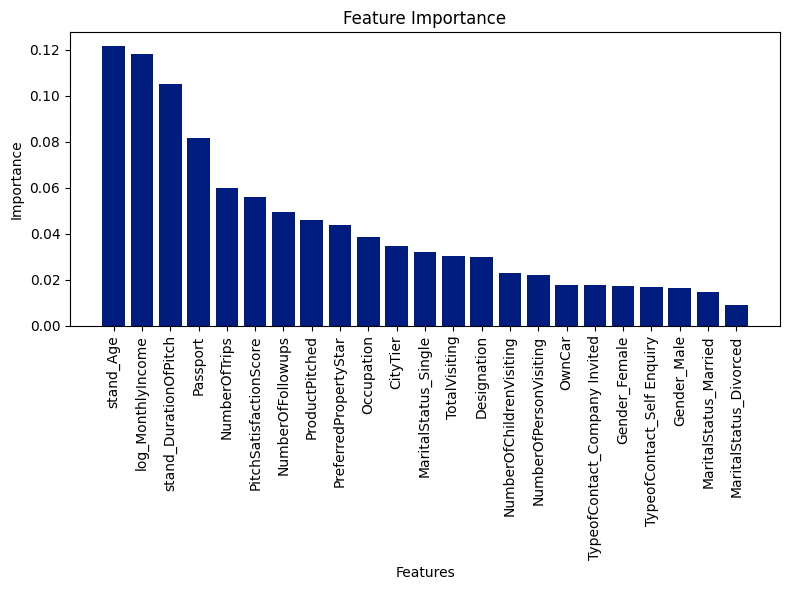

In [ ]:
# Train Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

# Plot feature importances as a histogram
plt.figure(figsize=(8, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Hasil Feature Performance dari metode Random Forest menunjukkan bahwa tidak ada fitur yang terlalu dominan sehingga relatif terdistribusi.

Karena dari dua metode tersebut semua fitur relatif terdistribusi maka kami menggunakan semua kolom sebagai fitur.

### Handling Imbalance ###

Karena adanya ketimpangan atau ketidakseimbangan dalam jumlah data pada kolom target maka perlu dilakukan oversampling. Oversampling akan dilakukan menggunakan metode **SMOTE**.

In [ ]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)
print(X_over_SMOTE.shape)
print(y_over_SMOTE.shape)

(7690, 23)
(7690,)


In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0.0    3845
1.0     892
dtype: int64


SMOTE
1.0    3845
0.0    3845
dtype: int64


Setelah dilakukan oversampling menggunakan SMOTE maka dapat dilihat bahwa jumlah data pada target sudah terdistrbusi secara merata, oleh karena itu siap untuk dilakukan pemodelan. 

In [ ]:
# check the shape of X_train and X_test

print(f'Jumlah data latih terdiri dari {len(X_train)} baris')
print(f'Jumlah data uji terdiri dari {len(X_test)} baris')

Jumlah data latih terdiri dari 3315 baris
Jumlah data uji terdiri dari 1422 baris
